# Importing libraries

In [1]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
lemmatizer= WordNetLemmatizer()

# Modelling
from sklearn.model_selection import train_test_split,KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.svm import SVC

sns.set(font_scale=1.3)
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\skakr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\skakr\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
# Read datasets
df_train = pd.read_csv('dataset/training.csv')
df_val = pd.read_csv('dataset/validation.csv')
df_test = pd.read_csv('dataset/test.csv')

In [3]:
#print first 5 rows
df_train.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [4]:
#print the shape of the data set
print(df_train.shape)

(16000, 2)


In [5]:
#print first 5 rows
df_test.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0


In [6]:
#print the shape of the data set
print(df_test.shape)

(2000, 2)


In [7]:
#print first 5 rows
df_val.head()

,text,label
0,im feeling quite sad and sorry for myself but ...,0
1,i feel like i am still looking at a blank canv...,0
2,i feel like a faithful servant,2
3,i am just feeling cranky and blue,3
4,i can have for a treat or if i am feeling festive,1


In [8]:
#print the shape of the data set
print(df_val.shape)

(2000, 2)


# Assessing

## Train dataset

In [10]:
#check if the data is balanced or not
df_train.label.value_counts()

label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64

In [11]:
#check if the data is balanced or not
df_train.label.value_counts() / df_train.shape[0] *100

label
1    33.51250
0    29.16250
3    13.49375
4    12.10625
2     8.15000
5     3.57500
Name: count, dtype: float64

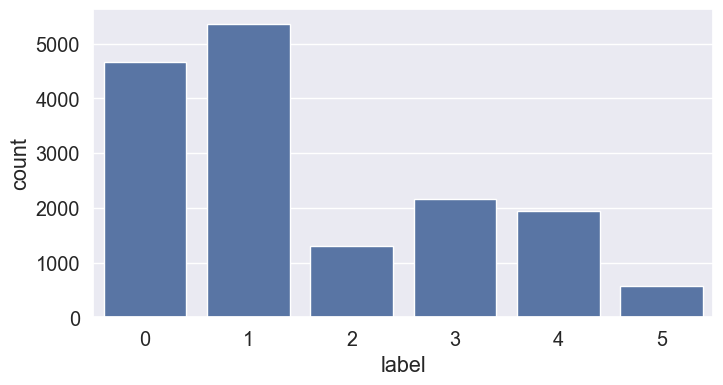

In [13]:
plt.figure(figsize=(8,4))
sns.countplot(x='label', data=df_train);

The data is imbalanced so, we may try to balance it but also, the emotions that we interested in are the most repeated emotion so, till now we can keep the data as it is

In [14]:
#print the number of null values in each column
df_train.isnull().sum()

text     0
label    0
dtype: int64

The data doesn't contains any null values

In [15]:
#print the number of duplicated values
df_train.duplicated().sum()

1

There is just one row which is duplicated but we need to check also if there are rows having the same text but different emotions

In [16]:
#removing duplicated values
index = df_train[df_train.duplicated() == True].index
df_train.drop(index, axis = 0, inplace = True)
df_train.reset_index(inplace=True, drop = True)

In [17]:
#print the rows which are duplicated (duplicated in the text but with different emotions)
df_train[df_train['text'].duplicated() == True]

,text,label
5067,i feel on the verge of tears from weariness i ...,1
6133,i still feel a craving for sweet food,2
6563,i tend to stop breathing when i m feeling stre...,3
7623,i was intensely conscious of how much cash i h...,0
7685,im still not sure why reilly feels the need to...,5
8246,i am not amazing or great at photography but i...,2
9596,ive also made it with both sugar measurements ...,1
9687,i had to choose the sleek and smoother feel of...,1
9769,i often find myself feeling assaulted by a mul...,0
9786,i feel im being generous with that statement,1


In [18]:
#print some of those rows to check
df_train[df_train['text'] == df_train.iloc[7623]['text']]

,text,label
1625,i was intensely conscious of how much cash i h...,3
7623,i was intensely conscious of how much cash i h...,0


In [19]:
df_train[df_train['text'] == df_train.iloc[14313]['text']]


,text,label
13653,i could feel myself hit this strange foggy wall,4
14313,i could feel myself hit this strange foggy wall,5


In [20]:
df_train[df_train['text'] == df_train.iloc[13879]['text']]


,text,label
7333,i feel like i am very passionate about youtube...,1
13879,i feel like i am very passionate about youtube...,2


In [22]:
#removing duplicated text
index = df_train[df_train['text'].duplicated() == True].index
df_train.drop(index, axis = 0, inplace = True)
df_train.reset_index(inplace=True, drop = True)

In [23]:
#Count the number of stopwords in the data
temp =df_train.copy()
stop_words = set(stopwords.words("english"))
temp['stop_words'] = temp['text'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()

stop_words
5     1416
7     1405
6     1392
4     1341
8     1319
3     1263
9     1177
10    1048
2      922
11     889
12     752
13     644
14     493
1      450
15     376
16     265
17     238
18     164
19     113
20      90
0       79
21      60
22      33
23      19
24       7
25       6
26       6
28       1
29       1
Name: count, dtype: int64

The data contains alot of stopwords (some rows contains more than 25 stopword!) so, we need to take care when we remove them as some rows may become empty

<Axes: ylabel='Frequency'>

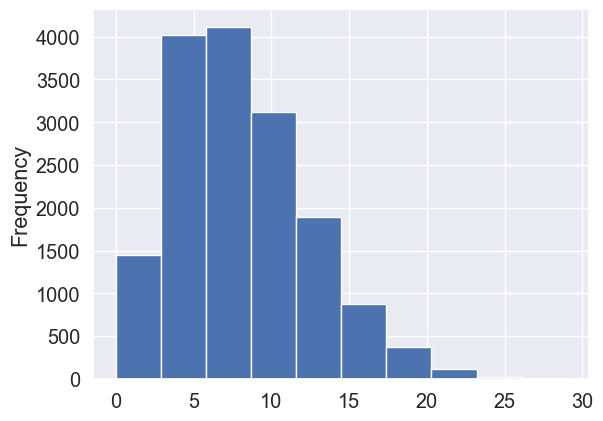

In [24]:
#distribution of stopwords visually
temp['stop_words'].plot(kind= 'hist')


## Test dataset

In [25]:
#check if the data is balanced or not
df_test.label.value_counts()

label
1    695
0    581
3    275
4    224
2    159
5     66
Name: count, dtype: int64

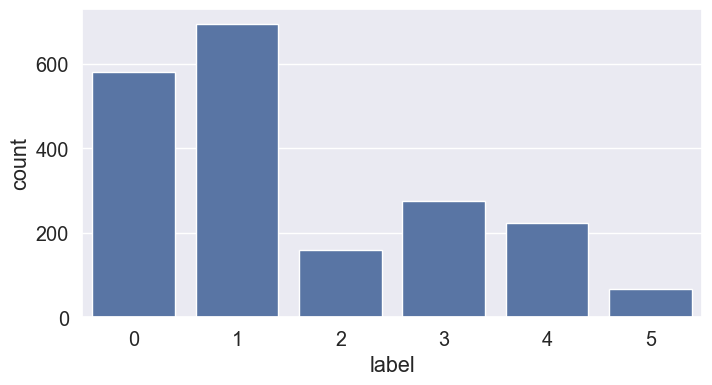

In [26]:
plt.figure(figsize=(8,4))
sns.countplot(x='label', data=df_test);



In [27]:
#print the number of null values in each column
df_test.isnull().sum()

text     0
label    0
dtype: int64

In [28]:
#print the number of duplicated values
df_test.duplicated().sum()

0

In [29]:

#print the rows which are duplicated
df_test[df_test['text'].duplicated() == True]



,text,label


In [30]:
#Count the number of stopwords in the data
temp =df_test.copy()
temp['stop_words'] = temp['text'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()


stop_words
7     184
6     179
3     175
5     175
4     163
9     163
8     139
10    123
2     118
11    115
12     84
13     71
15     61
14     58
1      42
16     40
17     31
18     22
20     17
19     11
21     10
0       8
23      7
24      2
22      2
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

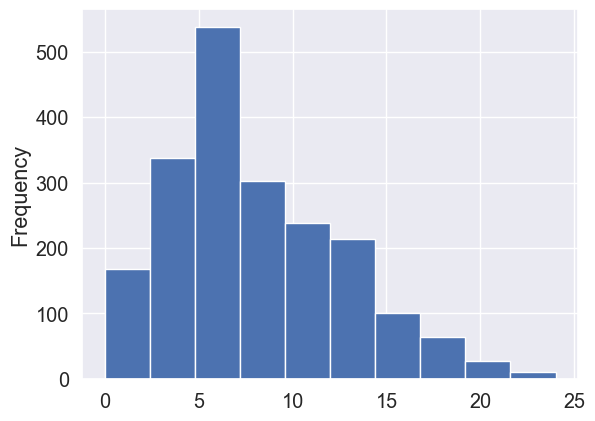

In [31]:
sns.set(font_scale=1.3)
temp['stop_words'].plot(kind= 'hist')

## Validation dataset

In [32]:
#check if the data is balanced or not
df_val.label.value_counts()

label
1    704
0    550
3    275
4    212
2    178
5     81
Name: count, dtype: int64

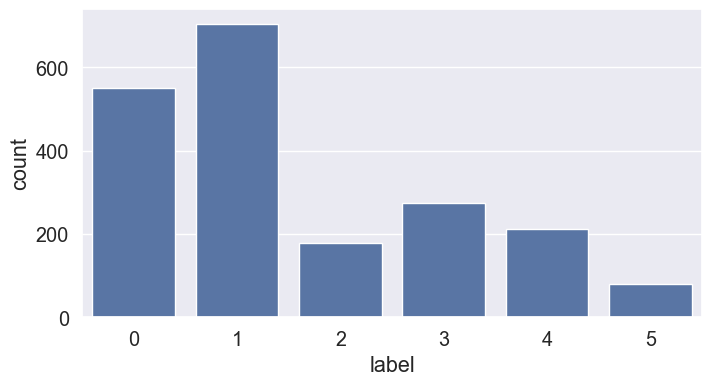

In [33]:
plt.figure(figsize=(8,4))
sns.countplot(x='label', data=df_val);

In [34]:
#print the number of null values in each column
df_val.isnull().sum()

text     0
label    0
dtype: int64

In [35]:
#print the number of duplicated values
df_val.duplicated().sum()

0

In [36]:
#print the rows which are duplicated
df_val[df_val['text'].duplicated() == True]

,text,label
603,i have had several new members tell me how com...,1
1993,i feel so tortured by it,3


In [37]:
df_val[df_val['text'] == df_val.iloc[603]['text']]


,text,label
300,i have had several new members tell me how com...,2
603,i have had several new members tell me how com...,1


In [38]:
df_val[df_val['text'] == df_val.iloc[1993]['text']]


,text,label
774,i feel so tortured by it,4
1993,i feel so tortured by it,3


In [39]:
#removing duplicated text
index = df_val[df_val['text'].duplicated() == True].index
df_val.drop(index, axis = 0, inplace = True)
df_val.reset_index(inplace=True, drop = True)

In [40]:
#Count the number of stopwords in the data
temp =df_val.copy()
temp['stop_words'] = temp['text'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()[:10]


stop_words
7     190
5     175
8     173
6     160
3     160
10    150
9     146
4     145
2     133
11    103
Name: count, dtype: int64

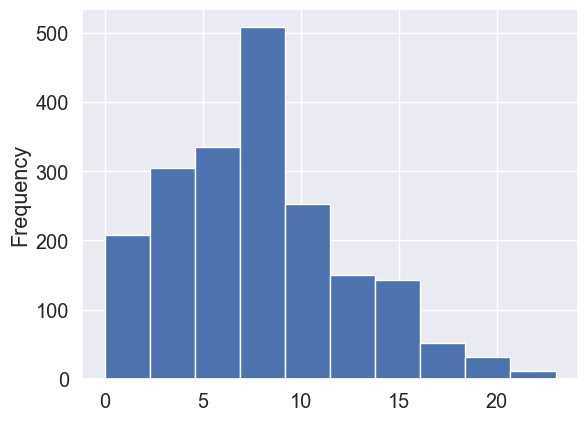

In [41]:
sns.set(font_scale=1.3)
temp['stop_words'].plot(kind= 'hist');

## Compare rows of the datasets

check that there is no data leakage

In [42]:
def dataframe_difference(df1, df2, which=None):
    """Find rows which are different between two DataFrames."""

    # Combine the two DataFrames using a merge operation, with the
    # indicator parameter set to True. This adds a column called _merge
    # to the resulting DataFrame, which indicates the source of each row.
    comparison_df = df1.merge(
        df2,
        indicator=True,
        how='outer'
    )

    # Filter the merged DataFrame based on the value of _merge. If which
    # is not specified, return all rows where _merge is not 'both'.
    # Otherwise, return all rows where _merge has the specified value
    if which is None:
        diff_df = comparison_df[comparison_df['_merge'] != 'both']
    else:
        diff_df = comparison_df[comparison_df['_merge'] == which]

    # Return the filtered DataFrame
    return diff_df

In [43]:
dataframe_difference(df_train, df_test, which='both')

,text,label,_merge


In [44]:
dataframe_difference(df_train, df_val, which='both')

,text,label,_merge


In [45]:
dataframe_difference(df_val, df_test, which='both')

,text,label,_merge


## Cleaning

In [50]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [57]:
import emoji

def replace_emojis_with_text(text):
    return emoji.demojize(text)

def lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    text = text.split()
    text = [lemmatizer.lemmatize(y) for y in text]
    return " ".join(text)

def remove_stop_words(text):
    Text = [i for i in str(text).split() if i not in stop_words]
    return " ".join(Text)

def removing_numbers(text):
    text = ''.join([i for i in text if not i.isdigit()])
    return text

def lower_case(text):
    text = text.split()
    text = [y.lower() for y in text]
    return " ".join(text)

def removing_punctuations(text):
    ## Remove punctuations
    text = re.sub(r'[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@^_`{|}~"""), ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = " ".join(text.split())
    return text.strip()

def removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan


def normalized_sentence(sentence):
    sentence = replace_emojis_with_text(sentence)  # Adding emoji replacement
    sentence = lower_case(sentence)
    sentence = remove_stop_words(sentence)
    sentence = removing_numbers(sentence)
    sentence = removing_punctuations(sentence)
    sentence = removing_urls(sentence)
    sentence = lemmatization(sentence)
    return sentence


In [58]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\skakr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [59]:
normalized_sentence("My Name is Mohamed. @Tweets,  plays 2022  Egypt_ 😍")


'name mohamed tweet play egypt smiling face with heart eye'

In [62]:
df_train['text'] = df_train['text'].apply(normalized_sentence)
df_test['text'] = df_test['text'].apply(normalized_sentence)
df_val['text'] = df_val['text'].apply(normalized_sentence)


## Modeling

## Text Preprocessing

In [63]:
#Splitting the text from the labels
X_train = df_train['text']
y_train = df_train['label']

X_test = df_test['text']
y_test = df_test['label']

X_val = df_val['text']
y_val = df_val['label']

In [64]:
# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

In [65]:
#print the labels after encoding
print(set(y_train))

{0, 1, 2, 3, 4, 5}


In [66]:
!pip install keras
from keras.utils import to_categorical


In [67]:
#Convert the class vector (integers) to binary class matrix
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [68]:
print(y_train)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [69]:
!pip install tensorflow

In [70]:
from tensorflow.keras.preprocessing.text import Tokenizer

## Tokenizing

In [71]:
# Tokenize words
tokenizer = Tokenizer(oov_token='UNK')
tokenizer.fit_on_texts(pd.concat([X_train, X_test], axis=0))

In [72]:
#word index: A dictionary of words and their uniquely assigned integers.
#tokenizer.word_index

In [73]:
#word counts: A dictionary of words and their counts.
#tokenizer.word_counts

In [74]:
#document count: A dictionary of words and how many documents each appeared in.
#in this dataset the output will be the number of rows
tokenizer.document_count

17969

In [75]:
#word docs: An integer count of the total number of documents(or rows) that were used to fit the Tokenizer.
#tokenizer.word_docs

In [76]:
#print the index of a single word
tokenizer.word_index['towards']

220

In [77]:
#converting a single sentence to list of indexes
tokenizer.texts_to_sequences(X_train[0].split())

[[53], [2], [531]]

In [78]:
#convert the list of indexes into a matrix of ones and zeros (BOW)
tokenizer.texts_to_matrix(X_train[0].split())

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [79]:
#the sentence contains three words and the size of the vocabulary is 14325
tokenizer.texts_to_matrix(X_train[0].split()).shape

(3, 14325)

In [80]:
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
sequences_val = tokenizer.texts_to_sequences(X_val)

In [81]:
#print the sentence after converting them to indexes
#sequences_train

## Padding

The vectors we obtain are generally not of equal lengths

For that, we might need to pad the sequences to max len.

In [82]:
df_test.shape

(2000, 2)

In [84]:
maxlen = max([len(t) for t in df_train['text']])
maxlen

229

In [85]:
!pip install keras.preprocessing

   ---------------------------------------- 0.0/42.6 kB ? eta -:--:--
   ------------------- -------------------- 20.5/42.6 kB 640.0 kB/s eta 0:00:01
   ---------------------------------------- 42.6/42.6 kB 513.3 kB/s eta 0:00:00


In [86]:
from keras.preprocessing.sequence import pad_sequences

In [87]:
X_train = pad_sequences(sequences_train, maxlen=229, truncating='pre')
X_test = pad_sequences(sequences_test, maxlen=229, truncating='pre')
X_val = pad_sequences(sequences_val, maxlen=229, truncating='pre')

vocabSize = len(tokenizer.index_word) + 1
print(f"Vocabulary size = {vocabSize}")

Vocabulary size = 14325


In [ ]:
#before
sequences_train[0]

[53, 2, 531]

In [ ]:
#after
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

## Word Embedding

**This code defines the following variables:**

**path_to_glove_file**: The file path to the GloVe word vectors file.

**num_tokens**: The size of the vocabulary. This is typically the number of unique words in the dataset.

**embedding_dim**: The dimensionality of the word vectors. This is usually set to a fixed value (e.g., 200, 300, etc.) depending on the size of the word vectors file that is being used.

**hits**: A counter for the number of words that are found in the embeddings_index dictionary.

**misses**: A counter for the number of words that are not found in the embeddings_index dictionary.

**embeddings_index**: A dictionary that will store the word vectors, with the words as keys and the word vectors as values.

In [88]:
# Read GloVE embeddings

path_to_glove_file = 'glove.6B.200d.txt'
num_tokens = vocabSize
embedding_dim = 200 #latent factors or features
hits = 0
misses = 0
embeddings_index = {}

I will intialize an embedding matrix with all zero values and then looping through the vocabulary (as defined by the tokenizer object) to assign word vectors to the corresponding rows of the embedding matrix. The word_index attribute of the tokenizer object is a dictionary that maps words to their indices in the vocabulary.

The embedding matrix will have a size of num_tokens rows and embedding_dim columns, where num_tokens is the size of the vocabulary and embedding_dim is the dimensionality of the word vectors.

For each word in the vocabulary, the code looks up the corresponding word vector in the embeddings_index dictionary and assigns it to the corresponding row of the embedding matrix. If the word is not found in the embeddings_index dictionary (i.e., if embedding_vector is None), the code increments the misses counter and the row of the embedding matrix remains all-zeros. If the word is found in the embeddings_index dictionary, the code increments the hits counter and assigns the word vector to the corresponding row of the embedding matrix. Finally, the code prints out the number of words that were converted (hits) and the number that were not found in the embeddings_index dictionary (misses).

In [91]:
# Read word vectors
with open(path_to_glove_file,encoding='utf-8') as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs
print("Found %s word vectors." % len(embeddings_index))

# Assign word vectors to our dictionary/vocabulary
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))


Found 400004 word vectors.
Converted 13243 words (1081 misses)


In [92]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from keras.layers import Embedding,LSTM, Dense, Bidirectional



## Modeling

In [93]:
# Build neural network architecture

adam = Adam(learning_rate=0.005)

model = Sequential()
model.add(Embedding(vocabSize, 200, input_length=X_train.shape[1], weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(256, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(128, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(128, dropout=0.2,recurrent_dropout=0.2)))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

C:\Users\skakr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │       2,865,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,865,000 (10.93 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,865,000 (10.93 MB)

In [94]:
!pip install keras

In [95]:
import keras
from keras.callbacks import EarlyStopping



In [96]:
#to stop the training when the loss starts to increase
callback = EarlyStopping(
    monitor="val_loss",
    patience=4,
    restore_best_weights=True,
)

In [97]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    batch_size=256,
                    epochs=30,
                    callbacks=[callback]
                   )

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1392s 22s/step - accuracy: 0.4170 - loss: 1.4875 - val_accuracy: 0.7538 - val_loss: 0.7670
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1416s 23s/step - accuracy: 0.7577 - loss: 0.7030 - val_accuracy: 0.8724 - val_loss: 0.3528
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1500s 23s/step - accuracy: 0.8792 - loss: 0.3391 - val_accuracy: 0.9154 - val_loss: 0.2132
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1408s 22s/step - accuracy: 0.9183 - loss: 0.1986 - val_accuracy: 0.9254 - val_loss: 0.1560
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1464s 22s/step - accuracy: 0.9288 - loss: 0.1593 - val_accuracy: 0.9304 - val_loss: 0.1368
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1508s 23s/step - accuracy: 0.9471 - loss: 0.1198 - val_accuracy: 0.9314 - val_loss: 0.1345
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1431s 23s/step - accuracy: 0.9478 - loss: 0.1093 - val_accuracy: 0.9344 - val_loss: 0.1418
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1462s 23s/step - accuracy: 0.9540 - loss: 0.0964 - val_accu

In [99]:
#print the overall loss and accuracy
model.evaluate(X_val, y_val, verbose=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 61s 957ms/step - accuracy: 0.9390 - loss: 0.1164


[0.13196346163749695, 0.9374374151229858]

In [100]:
#print the overall loss and accuracy
model.evaluate(X_test, y_test, verbose=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 59s 936ms/step - accuracy: 0.9248 - loss: 0.1792


[0.17256517708301544, 0.9269999861717224]

In [102]:
predicted = model.predict(X_test)
y_pred = predicted.argmax(axis=-1)

print(classification_report(le.transform(df_test['label']), y_pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 60s 952ms/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       581
           1       0.94      0.94      0.94       695
           2       0.80      0.81      0.80       159
           3       0.95      0.92      0.94       275
           4       0.88      0.93      0.91       224
           5       0.90      0.67      0.77        66

    accuracy                           0.93      2000
   macro avg       0.90      0.87      0.89      2000
weighted avg       0.93      0.93      0.93      2000



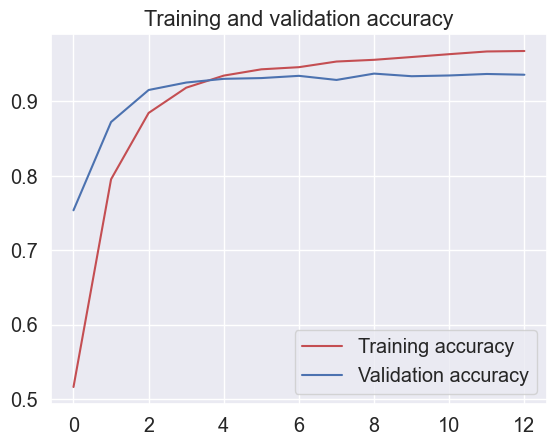

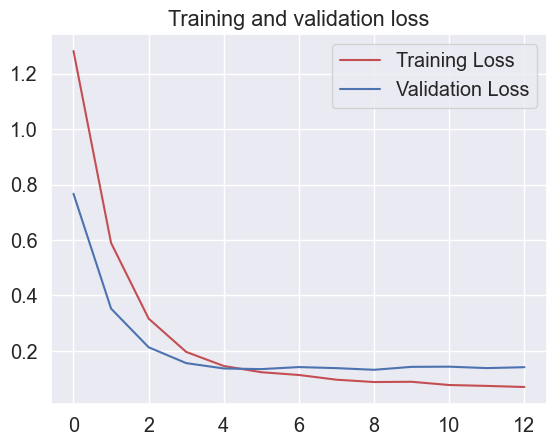

In [103]:
# Visualize Loss & Accuracy

%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**So, you may asking when I give a sentence to the model how the classification will done?**

1. First, the model will convert the words in the sentence into numerical representations, also known as word embeddings. These word embeddings capture the meaning of the words and their relationships to each other in a continuous vector space.

2. The word embeddings for each word in the sentence are then input to two separate LSTM models: one that processes the sequence forwards and one that processes it backwards. At each time step, each LSTM processes the current word embedding and the previous hidden state to produce a new hidden state. The hidden state at each time step is a combination of the previous hidden state and the current input, and it captures the information from all the previous time steps in the sequence.

3. After processing all the words in the sentence, the two LSTMs will have final hidden states that encode the meaning of the sentence from both the forwards and backwards directions. These final hidden states are then combined and used to make a prediction.

In [104]:
# Classify custom sample

sentences = [
            "He's over the moon about being accepted to the university",
            "Your point on this certain matter made me outrageous, how can you say so? This is insane.",
            "I can't do it, I'm not ready to lose anything, just leave me alone",
            "Merlin's beard harry, you can cast the Patronus charm! I'm amazed!"
            ]
for sentence in sentences:
    print(sentence)
    sentence = normalized_sentence(sentence)
    sentence = tokenizer.texts_to_sequences([sentence])
    sentence = pad_sequences(sentence, maxlen=229, truncating='pre')
    result = le.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
    proba =  np.max(model.predict(sentence))
    print(f"{result} : {proba}\n\n")

He's over the moon about being accepted to the university
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1 : 0.995934247970581


Your point on this certain matter made me outrageous, how can you say so? This is insane.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
3 : 0.7141188979148865


I can't do it, I'm not ready to lose anything, just leave me alone
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
4 : 0.5036612749099731


Merlin's beard harry, you can cast the Patronus charm! I'm amazed!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
5 : 0.8440321683883667




In [105]:
sentence= 'my old brother is dead'
print(sentence)
sentence = normalized_sentence(sentence)
sentence = tokenizer.texts_to_sequences([sentence])
sentence = pad_sequences(sentence, maxlen=229, truncating='pre')
result = le.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
proba =  np.max(model.predict(sentence))
print(f"{result} : {proba}\n\n")

my old brother is dead
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
0 : 0.8626101613044739




In [106]:
sentence= 'Im feeling sad today'
print(sentence)
sentence = normalized_sentence(sentence)
sentence = tokenizer.texts_to_sequences([sentence])
sentence = pad_sequences(sentence, maxlen=229, truncating='pre')
result = le.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
proba =  np.max(model.predict(sentence))
print(f"{result} : {proba}\n\n")

Im feeling sad today
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
0 : 0.999866247177124




In [107]:
model.save('my_model91.h5')

In [109]:
# import pickle

# # Save the tokenizer and label encoder
# with open("tokenizer.pickle", "wb") as handle:
#     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open("label_encoder.pickle", "wb") as handle:
#     pickle.dump(le, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open("vocabSize.pickle", "wb") as handle:
#     pickle.dump(vocabSize, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open("stopwords.pickle", "wb") as handle:
#     pickle.dump(stop_words, handle, protocol=pickle.HIGHEST_PROTOCOL)